In [1]:
from netaddr import *
import json
import pandas as pd
import numpy as np
from datetime import datetime
# import maxminddb
import time
import matplotlib.pyplot as plt
import dateutil.parser as dp
# import matplotlib.patches as patches
import sys
# import gzip
import math
from difflib import SequenceMatcher
# from scipy import spatial
from collections import Counter
from ast import literal_eval
from subprocess import check_output
# from publicsuffix import PublicSuffixList
# from publicsuffix import fetch
import ipdb
import random
# psl_file = fetch()
# psl = PublicSuffixList(psl_file)
_CACHE = {}

In [28]:
pdns_2018_9_10 = pdns_2018_9_10.drop(['ip'], axis=1)
pdns_2018_9_10.to_csv('serverius_2018_09_10_notype.csv', index=False)

In [2]:
def evalstr(x):
    if pd.isnull(x):
        return np.nan
    else:
        return literal_eval(x)
    
parse_dates = ['fromtime', 'totime']
pdns_2018_9_10 = pd.read_csv('serverius_2018_09_10_notype.csv', parse_dates=parse_dates,  dtype={"ip": object, "domain": object,
                                                                                                "Type": object, "count": int,"isp": object,
                                                                                                "is_hosting_provider": object,
                                                                                                "is_public_proxy": object, "ip_int": int,
                                                                                                "is_ns": object, "dhe": bool,
                                                                                                "domains_ass":object, "ns_ass": object, 
                                                                                                 "age": float, "ttl": float})
pdns_2018_9_10['ip'] = pdns_2018_9_10['ip_int'].apply(lambda x: IPAddress(x))
pdns_2018_9_10['ns_ass'] = pdns_2018_9_10.ns_ass.apply(lambda x: evalstr(x))
# pdns_2018_9_10['doains_ass'] = pdns_2018_9_10.domains_ass.apply(lambda x: evalstr(x))
# pdns_2018_9_10['age'] = pdns_2018_9_10.apply(getAge, axis = 1 )
# pdns_2018_9_10['tld'] = pdns_2018_9_10.apply(checknantld, axis = 1)
# pdns_2018_9_10['2ld'] = pdns_2018_9_10.apply(checknan2ld, axis = 1)
pdns_2018_9_10.index = pdns_2018_9_10.ip_int
pdns_2018_9_10 = pdns_2018_9_10.sort_index()
pdns_no_dates_count = pdns_2018_9_10.drop(['fromtime', 'count', 'totime', 'dhe'], axis = 1)

with open('./merged_net_list.csv', 'r')as f:
    readlist = (f.read()).split(';')
    readlist = readlist[0:-1]
    merged_net_list = [IPNetwork(x) for x in readlist]
    print(merged_net_list)
    
net_dic = {}
counter = 0
for i in range(0, len(merged_net_list)):
    value = pdns_no_dates_count.loc[(pdns_no_dates_count['ip'] <= merged_net_list[i][-1]) & (pdns_no_dates_count['ip'] >= merged_net_list[i][0])]
    if len(value) > 20:
        key = 'block' + str(counter)
        print(('net: {0}, entries: {1}, {2}').format(merged_net_list[i], len(value), key))
#         value = value.reset_index()
        net_dic[key] = value
        counter += 1
if not isinstance((net_dic['block0'].iloc[1,:].ns_ass), list):
    print('[parse error]')

[IPNetwork('5.178.64.0/21'), IPNetwork('5.188.12.0/22'), IPNetwork('5.255.64.0/19'), IPNetwork('46.249.32.0/19'), IPNetwork('89.47.1.0/24'), IPNetwork('91.142.132.0/24'), IPNetwork('91.198.106.0/24'), IPNetwork('91.205.192.0/23'), IPNetwork('91.216.34.0/24'), IPNetwork('91.217.191.0/24'), IPNetwork('91.220.37.0/24'), IPNetwork('91.220.53.0/24'), IPNetwork('91.221.69.0/24'), IPNetwork('91.243.44.0/22'), IPNetwork('93.158.200.0/21'), IPNetwork('93.158.208.0/20'), IPNetwork('160.20.152.0/22'), IPNetwork('178.21.16.0/21'), IPNetwork('185.1.95.0/24'), IPNetwork('185.8.176.0/22'), IPNetwork('185.12.12.0/22'), IPNetwork('185.42.59.0/24'), IPNetwork('185.53.160.0/22'), IPNetwork('185.79.112.0/22'), IPNetwork('185.116.166.0/23'), IPNetwork('193.23.143.0/24'), IPNetwork('194.48.92.0/22'), IPNetwork('194.107.76.0/22'), IPNetwork('194.247.30.0/23'), IPNetwork('194.247.38.0/24')]
net: 5.178.64.0/21, entries: 8141, block0
net: 5.255.64.0/19, entries: 8818, block1
net: 46.249.32.0/19, entries: 8396, 

In [3]:
with open('serverius-mnt.json') as json_file: 
    data = json.load(json_file)
    raw_net_list = []
    for p in data['objects']['object']:
#         print(p['type'])
        if p['type'] == 'inetnum':
            ip_range = p['attributes']['attribute'][0]['value'].split(' - ')
            ip_net = iprange_to_cidrs(ip_range[0], ip_range[1])
            raw_net_list.extend(ip_net)
unmerged_total = 0
for network in raw_net_list:
    unmerged_total += len(network)
merged_net_list = cidr_merge(raw_net_list)
merged_total = 0
for network in merged_net_list:
    merged_total += len(network)
merged_net_list
with open('./merged_net_list.csv', 'w+')as f:
    for net in merged_net_list:
        line = str(net) + ';'
        print(line)
        f.write(line)

5.178.64.0/21;
5.188.12.0/22;
5.255.64.0/19;
46.249.32.0/19;
89.47.1.0/24;
91.142.132.0/24;
91.198.106.0/24;
91.205.192.0/23;
91.216.34.0/24;
91.217.191.0/24;
91.220.37.0/24;
91.220.53.0/24;
91.221.69.0/24;
91.243.44.0/22;
93.158.200.0/21;
93.158.208.0/20;
160.20.152.0/22;
178.21.16.0/21;
185.1.95.0/24;
185.8.176.0/22;
185.12.12.0/22;
185.42.59.0/24;
185.53.160.0/22;
185.79.112.0/22;
185.116.166.0/23;
193.23.143.0/24;
194.48.92.0/22;
194.107.76.0/22;
194.247.30.0/23;
194.247.38.0/24;


In [4]:
def equal_el(el1, el2):
    if not isinstance(el1, list):
        el1 = [el1]
    if not isinstance(el2, list):
        el2 = [el2]
    return not set(el1).isdisjoint(el2)

In [5]:
def combine_categories(propnew, propold):
    #if there is no or a single element return that element
    if isinstance(propnew, type(np.nan)):
        if isinstance(propold, type(np.nan)):
            return np.nan
        else:
            return propold
    if isinstance(propold, type(np.nan)):
            return propnew
    #add both elements to list if they are not in a list already
    if not isinstance(propnew, list):
        propnew = [propnew]
    if not isinstance(propold, list):
        propold = [propold]
    return propnew + propold

def combine_bool(new, old):
    if isinstance(old, list):
        return old
    elif isinstance(new, list):
        return new
    elif old == new:
        return old
    else:
        return [old, new]

def combine_numerical(new, old):
    if pd.isnull(new):
        if pd.isnull(old):
            return np.nan
        else:
            return old
    elif pd.isnull(old):
        return new
    else:
        return (new + old) / 2

def calc_tld(net):
    if not isinstance(net.tld, list):
        net[str(net.tld)] = 1
        return net
    tld_occurrences = Counter(net.tld)
#     print(tld_occurrences)
    for key in tld_occurrences:
        value = tld_occurrences[key]
        net[str(key)] = float(value/len(net.tld))
    return net

def setify(item):
    if (not isinstance(item, float)) and (not isinstance(item, str)):
        item = set(item)
        return [x for x in item]
    else:
        return item

def combine_networks(netnew, netold, rand = False):
    if rand:
        if netnew.ip != netold.ip:
            if pd.notnull(netold.last_ip):
                netnew.last_ip = netold.last_ip
            else:
                netnew.last_ip = netold.ip
        return netnew
    #'domain', 'isp', 'is_hosting_provider', 'is_public_proxy', 'ip_int', 'is_ns', 'domains_ass', 'ns_ass', 'age', 'tld', '2ld', 'ttl', 'smtp','ip'
    netnew.domain = combine_categories(netnew.domain, netold.domain)
    netnew.domain = setify(netnew.domain)
    netnew.ns_ass = combine_categories(netnew.ns_ass, netold.ns_ass)
    netnew.ns_ass = setify(netnew.ns_ass)
    
    netnew.is_ns = combine_categories(netnew.is_ns, netold.is_ns)
    netnew.is_ns = setify(netnew.is_ns)
    netnew.domains_ass = combine_categories(netnew.domains_ass, netold.domains_ass)
    netnew.domains_ass = setify(netnew.domains_ass)
    
    netnew.tld = combine_categories(netnew.tld, netold.tld)
    netnew = calc_tld(netnew)
    
    secondld = (combine_categories(netnew['2ld'], netold['2ld']))
    netnew['2ld'] = setify(secondld)
        
    netnew.ttl = combine_numerical(netnew.ttl, netold.ttl)
    netnew.age = combine_numerical(netnew.age, netold.age)
    
    if netnew.isp != netold.isp:
        netnew.isp = [netnew.isp, netold.isp]
    netnew.is_public_proxy = combine_bool(netnew.is_public_proxy, netold.is_public_proxy)
    netnew.is_hosting_provider = combine_bool(netnew.is_hosting_provider, netold.is_hosting_provider)
    netnew.smtp = combine_bool(netnew.smtp, netold.smtp)
    
    if netnew.ip != netold.ip:
#         print('netnewip: ' + str(netnew.ip) + ', netoldip: ' + str(netold.ip))
        if pd.notnull(netold.last_ip):
            netnew.last_ip = netold.last_ip
        else:
            netnew.last_ip = netold.ip
#     print(str(netnew.ip) + ' lastIP: ' + str(netnew.last_ip))
    return netnew

In [6]:
def merge_network(network, itemnumber):
    start = time.time()
    result = {}
    _UNIQUE_TLD = [str(x) for x in network.tld.unique()]
    if 'nan' in _UNIQUE_TLD:
        _UNIQUE_TLD.remove('nan')
    counter = 0
    for index, row in network.iterrows():
        #for the first row, 
        if counter <= 0:
            prev_entry = row.copy()
            prev_ip = prev_entry.ip_int
            result[prev_ip] = prev_entry
            if isinstance(prev_entry.tld, str):
                result[prev_ip][str(prev_entry.tld)] = 1
            counter += 1
            continue
        new_entry = row.copy()
        new_ip = new_entry.ip_int
        if prev_ip == new_ip:
            prev_entry = combine_networks(prev_entry, new_entry)
            result[prev_ip] = prev_entry
        else:
            result[new_ip] = new_entry
            if isinstance(new_entry.tld, str):
                result[new_ip][str(new_entry.tld)] = 1
            prev_entry = new_entry
            prev_ip = new_ip
    ans = pd.DataFrame(result).T 
    ans[_UNIQUE_TLD] = ans[_UNIQUE_TLD].fillna(0)
    print(('Block: {0}, time taken: {1}').format(itemnumber, time.time() - start))
    return ans 

def initialize_dist(dataframe, threshold, _FACTORS, itemnumber, add_null):
    start = time.time()
    ans = dataframe.copy()
    remove = {'2ld', 'age','domain', 'domains_ass',
       'ip', 'ip_int', 'is_hosting_provider', 'is_ns', 'is_public_proxy',
       'isp', 'nan', 'ns_ass', 'smtp', 'tld', 'ttl', 'distance'}
    _UNIQUE_TLD = [e for e in ans.columns if e not in remove]
    ans = ans.reset_index()
    ttl_min = ans.ttl.min()
    ttl_max = ans.ttl.max()
    age_min = ans.age.min()
    age_max = ans.age.max()
    for index, row in ans.iterrows():
        if index <= ans.index[0]:
            continue
        elif index == ans.index[-1]:
            break
        else:
            ans.at[index - 1, 'distance'] = calculate_distance(ans.loc[index -1,:].copy(), row.copy(),
                                                               _UNIQUE_TLD, threshold, _FACTORS,
                                                              ttl_min, ttl_max, age_min, age_max, add_null)
    ans.index = ans.ip_int
#     print(('Block: {0} distances initialized, time taken: {1}').format(itemnumber, time.time() - start))
    return ans


In [ ]:
_FACTORS = {"domain": 0, "ns_ass": 1, "tld": 0, "2ld": 0, "ttl": 0, "age":0}
test = merge_network(net_dic['block2'], 2, 0, _FACTORS)
test2 = initialize_dist(test, threshold = 0, _FACTORS = _FACTORS, itemnumber= 2)

In [114]:
info = pdns_no_dates_count.drop(['smtp', 'is_ns', 'domains_ass', 'ip_int', 'domain'], axis=1)
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126178 entries, 95567873 to 3270977274
Data columns (total 9 columns):
isp                    126178 non-null object
is_hosting_provider    126178 non-null object
is_public_proxy        126178 non-null object
ns_ass                 30806 non-null object
age                    126178 non-null float64
tld                    123734 non-null object
2ld                    123914 non-null object
ttl                    26528 non-null float64
ip                     126178 non-null object
dtypes: float64(2), object(7)
memory usage: 9.6+ MB


In [7]:
def is_nan(el):
    if isinstance(el, list):
        return False
    else:
        return pd.isnull(el)
    
#Compare sequences based on an adaptation of the Ratcliff-Obershelp algorithm
def compare_word_list(element1, element2, threshold):
    if isinstance(element1, list):
        True
    elif isinstance(element1, str):
        element1 = [element1]
    else:
        return 0
    if isinstance(element2, list):
        True
    elif isinstance(element2, str):
        element2 = [element2]
    else:
        return 0
        
    set_b = {el for el in element1}
    set_a = {el for el in element2}
    common = set_a.intersection(set_b)
    if common:
        return 0.0
    
    element_a = list(set_a)
    element_b = list(set_b)
    
    i = len(element_a)
    j = len(element_b)
    if i >= 500 or j >= 500:
        print(i)
        print(j)
    matrix = np.empty((i,j,))
    matrix[:] = np.nan
    for row in range(0, i):
        for col in range(0,j):
            if element_a[row] == element_b[col]:
                matrix[row][col] = 0.0
                continue
            if not np.isnan(matrix[row][col]):
                continue
            match = 1 - SequenceMatcher(None, element_a[row], element_b[col]).ratio()
            if match <= threshold:
#                 print(('el1: {0}, el2: {1}, dist: {2}').format(element_a[row], element_b[col], match))
                return match
            else:                                        
                matrix[row][col] = match
    return matrix.min()

def tld_dist(ip1, ip2, _UNIQUE_TLD):
    total = 0
    divider = 0    
    for element in ip1[_UNIQUE_TLD].index:
        el1 = ip1[element]
        el2 = ip2[element]
        if el1 == 0 and el2 == 0:
            continue
        else:
            divider += 1
            total += math.fabs(el1 - el2)
    if divider == 0:
        return 0
    else:
        return (total / divider)
    
def numeric_dist(att1, att2, mini, maxi):
    if pd.isnull(att1) or pd.isnull(att2):
        return 0 
    else:
        att1 = att1 /( maxi - mini)
        att2 = att2 /( maxi - mini)
    return (math.fabs(att1 - att2))

def calculate_distance(ip1, ip2, _UNIQUE_TLD, threshold, _FACTORS, ttl_min, ttl_max, age_min, age_max, add_null):
    #'domain', 'isp', 'is_hosting_provider', 'is_public_proxy', 'ip_int', 'is_ns', 'domains_ass', 
    #'ns_ass', 'age', 'tld', '2ld', 'ttl', 'smtp','ip'
    if add_null:
        nullans = 0.0
    else:
        nullans = math.inf
    #dont add if one of the 2 is a nameserver, by increasing distance to infinity
    if is_nan(ip1.domain) or is_nan(ip2.domain):
        return nullans
    
    distances = {"domain": np.nan, "ns_ass":np.nan, "tld":np.nan, "2ld":np.nan, "ttl":np.nan, "age":np.nan}
    if _FACTORS['domain'] != 0:
        distances["domain"] = compare_word_list(ip1.domain, ip2.domain, threshold, nullans)
    
    if _FACTORS['ns_ass'] != 0:
        distances["ns_ass"] = compare_word_list(ip1.ns_ass, ip2.ns_ass, threshold, nullans)
        
    if _FACTORS['tld'] != 0:
        distances["tld"] = tld_dist(ip1, ip2, _UNIQUE_TLD, nullans)
        
    if _FACTORS['2ld'] != 0:
        distances["2ld"] = compare_word_list(ip1['2ld'], ip2['2ld'], threshold, nullans)
        
    if _FACTORS['ttl'] != 0:
        distances["ttl"] = numeric_dist(ip1.ttl, ip2.ttl, ttl_min, ttl_max, nullans)
        
    if _FACTORS['age'] != 0:
        distances["age"] = numeric_dist(ip1.age, ip2.age, age_min, age_max, nullans)
        
    if all(pd.isnull(value) for value in distances.values()):
        return nullans
    
    #add weights to distances
    final_distance = 0
    divider = 0
    for k in distances:
        v = distances[k]
        if pd.notnull(v):
            final_distance += v * _FACTORS[k]
            divider += _FACTORS[k]
    return final_distance / divider


In [8]:
def cluster(df, threshold, clusters, _FACTORS, min_dist, add_null, rand = False):
    frame = df.copy()
    frame['last_ip'] = np.nan
    frame = frame.reset_index(drop = True)
    
    remove = {'2ld', 'age','domain', 'domains_ass',
       'ip', 'ip_int', 'is_hosting_provider', 'is_ns', 'is_public_proxy',
       'isp', 'nan', 'ns_ass', 'smtp', 'tld', 'ttl', 'distance', 'index'}
    _UNIQUE_TLD = [e for e in df.columns if e not in remove]
    
    n = len(frame)
    
    if rand:
        frame = frame[['distance', 'ip']]
        for index in range(len(frame)):
            while frame.loc[index,'distance'] <= min_dist:
                frame.at[index, 'distance'] = frame.loc[index + 1,'distance']
                frame.at[index, 'last_ip'] = frame.loc[index + 1].ip
                index += 1     
    else:
        while n > clusters and frame.distance.min() <= min_dist:
            ttl_min = frame.ttl.min()
            ttl_max = frame.ttl.max()
            age_min = frame.age.min()
            age_max = frame.age.max()
            index = frame.distance.idxmin()
            min_row = frame.loc[index,:].copy()
            next_row = frame.loc[index + 1,:].copy()

            new_el = combine_networks(min_row, next_row)
            
            try:
                frame.at[index] = new_el
            except:
                for i in frame.columns:
                    try:
                        frame.at[index, i] = new_el[i]
                    except:
                        print(frame[i])
                        print(new_el[i])
                        frame[index, i] = frame[index,i].astype(object)
                        frame.at[index,i] = new_el[i]
                
                
            if index == len(frame) - 2:
                frame.at[index, 'distance'] = math.inf
            else:
                next_next_row = frame.loc[index + 2,:].copy()
                frame.at[index, 'distance'] = calculate_distance(min_row, next_next_row, _UNIQUE_TLD,
                                                                 threshold, _FACTORS, ttl_min, ttl_max, age_min, age_max, add_null)
            if index != 0:
                prev_row = frame.loc[index - 1,:].copy()
                frame.at[index - 1,'distance'] = calculate_distance(prev_row, min_row, _UNIQUE_TLD,
                                                                    threshold, _FACTORS, ttl_min, ttl_max, age_min, age_max, add_null )

            frame = frame.drop(index + 1)
            frame = frame.reset_index(drop = True)
            n -= 1
    return frame


In [9]:
def get_validation(raw_net_list):
    printlist = '5.178.64.0/21, 5.255.64.0/19, 46.249.32.0/19, 89.47.1.0/24, 91.142.132.0/24, 91.198.106.0/24, 91.205.192.0/23, 91.216.34.0/24,  91.220.37.0/24, 91.220.53.0/24, 91.221.69.0/24, 93.158.200.0/21, 93.158.208.0/20, 178.21.16.0/21, 185.8.176.0/22, 185.12.12.0/22, 185.53.160.0/22, 185.79.112.0/22, 185.116.166.0/23, 193.23.143.0/24, 194.247.30.0/23, 194.247.38.0/24'
    printlist = printlist.split(', ')
    check_list = {IPNetwork(x):[] for x in printlist}
    subnet_list = sorted(raw_net_list)
    for index in range(0, len(subnet_list) -2):
        net1 = IPNetwork(subnet_list[index])
        net2 = IPNetwork(subnet_list[index + 1])
        if index == len(subnet_list) - 2:
            net1 = net2
        if net1[-1] > net2[0]:
            continue
        else:
            for checknet in check_list:
                if net1 in checknet:
                    check_list[checknet].append(IPNetwork(net1))
    return check_list

def cal_error(clustering, expected):
    my_net = []
    total_net_length = 0
    nets_amount = 0
    for i, row in clustering.iterrows():
        if pd.notnull(row.last_ip):
            my_net.append((IPAddress(row.ip), IPAddress(row.last_ip)))
            nets_amount += 1
            nets_found = iprange_to_cidrs(IPAddress(row.ip), IPAddress(row.last_ip))
            for net in nets_found:
                total_net_length += len(net)            
    
    misallocation = 0
    for expected_net in expected:
        expected1 = expected_net[0]
        expected2 = expected_net[-1]
        for actualnet in my_net:
            actual1 = actualnet[0]
            actual2 = actualnet[-1]
            if expected1 > actual1 and expected1 < actual2:
                misallocation += 1
            elif expected2 > actual1 and expected2 < actual2:
                misallocation += 1
    average_per_net = 0
    if nets_amount != 0:
        average_per_net = (total_net_length / nets_amount)
    return [total_net_length, misallocation, average_per_net]

def read_exp(filename):
    with open('./' + filename, 'r')as f:
        ans = []
        start = 0
        for line in f:
#             print(line)
            line = line.replace(',', '.')
            design = line.split(';')[0:8]
            if start < 2: 
                start += 1
                continue  
            if not design[0]: break
#             print(design)
            ans.append([float(x) for x in design])
    return ans

def get_expected_coverage(expected):
    expected = sorted(expected)
    result = 0
    counter = 0
    for counter in range(0, len(expected) - 1):
        net1 = expected[counter]
        nextnet = expected[counter + 1]
        if net1[0] <= nextnet [0] and net1[-1] <= nextnet[-1]:
            result += len(net1)
    return result

def run_tests(network, block_nr, dictionary, exp_filename, _EXP_TOGO, _RESULTS):
    
    exp_design = read_exp(exp_filename)
    _EXP_TOGO = exp_design
    if not network in _CACHE:
        merged_block = merge_network(network = dictionary['block' + str(block_nr)], itemnumber= block_nr)
        _CACHE[network] = merged_block
    else:
        print(str(network) + ' in cache!')
        merged_block = _CACHE[network]
    merged_block = merged_block[pd.notnull(merged_block.domain)]   
    val_set = get_validation(raw_net_list)
    expected = val_set[IPNetwork(network)]
    total_net_length = len(IPNetwork(network))
    
    results = []
    for exp in exp_design:
        _EXP_TOGO = _EXP_TOGO[1:]
        start = time.time()
        
        #read out design
        exp_num = exp[0]
        threshold = 0
        min_dist = exp[2]
        add_null = 1
        _FACTORS = {"domain": 0, "ns_ass": exp[3], "tld": exp[4], "2ld": exp[5], "ttl": exp[6], "age":exp[7]}
        
        #initialize block
        distance_block = initialize_dist(dataframe= merged_block, threshold = threshold,
                                         _FACTORS = _FACTORS, itemnumber= block_nr, add_null = add_null)
        
        #cluster block
        clustering = cluster(df= distance_block, threshold = threshold,
                             clusters= 1 ,_FACTORS= _FACTORS, min_dist= min_dist, add_null= add_null)
        
        #calc metrics
        metric = cal_error(clustering, expected)
        print(exp)
        print('Experiment: ' + str(int(exp_num)) + ', Missallocated: ' + str(metric[1])
               + ', coverage of net: ' + str(metric[0] / total_net_length)
              + ', average IP per net: ' + str(metric[2]) + ', time taken: '
              + str(time.time() - start))
        _RESULTS.append([exp_num, metric[0], metric[1], metric[2]])
        if int(exp_num + 1) % 500 == 0:
            write_output(_RESULTS, 'results_' + str(network) + '_' + str(exp_num))
            del(_RESULTS)
    return _RESULTS    

In [11]:
_RESULTS = []
_EXP_TOGO = []
exp1 = run_tests('93.158.208.0/20', 12, net_dic, 'Experimenteel_ontwerp.csv', _EXP_TOGO, _RESULTS)

93.158.208.0/20 in cache!
[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Experiment: 0, Missallocated: 21, coverage of net: 0.662841796875, average IP per net: 2715.0, time taken: 24.423403024673462
[1.0, 0.1, 0.0, 5.0, 5.0, 10.0, 5.0, 5.0]
Experiment: 1, Missallocated: 0, coverage of net: 0.00439453125, average IP per net: 9.0, time taken: 2.7688238620758057
[2.0, 0.1, 0.0, 10.0, 10.0, 5.0, 10.0, 10.0]
Experiment: 2, Missallocated: 0, coverage of net: 0.00439453125, average IP per net: 9.0, time taken: 2.766960859298706
559
1
560
1
561
405
1
561
561
405
1
571
571
405
572
405
572
405
2
572
572
405
574
405
575
405
575
405
1
576
576
405
1
981
981
14
1
982
982
14
21
983
983
14
1
1004
1004
14
1
1018
1018
1
1
1019
1
1020
4
1022
2
1026
1
500
500
1
2
501
501
1
1
503
503
1
1
504
504
1
2
505
505
1
1
507
507
1
1
508
508
1
1
509
1
520
520
1
1
521
521
2
4
522
522
2
25
526
526
2
26
526
3
552
552
2
[3.0, 0.1, 0.4, 0.0, 5.0, 5.0, 5.0, 10.0]
Experiment: 3, Missallocated: 22, coverage of net: 0.66162109375, 

8
519
5
527
11
532
1
543
1
544
22
545
6
567
53
573
4
626
4
630
1
634
50
635
1
685
1
686
1
687
1
688
1
689
3
841
1
844
1
845
1
846
2
847
1
849
4
517
1
974
2
975
2
977
2
523
11
979
1
990
1
991
2
992
5
525
1
995
1
997
3
530
21
998
1
1019
1
1020
4
1022
2
1026
3
1028
1
1039
3
1040
3
544
1
1043
12
1044
1
1056
36
550
9
1057
9
1066
2
593
3
1116
3
661
2
1119
2
1121
9
664
2
1123
1
1125
1
1126
14
673
1
1127
2
1128
11
1130
8
703
3
711
1
1146
1
1147
4
715
2
1148
3
1150
3
1153
3
723
4
1156
3
726
1
1160
22
1161
2
740
1
1183
2
742
1
1187
2
1188
1
1190
3
749
1
1191
5
752
1
1192
2
757
1
1193
1
1194
12
1195
1
1207
3
1208
2
1211
1
1213
13
767
19
1214
2
1233
1
1235
1
1236
1
1237
4
780
1
1238
4
847
1
1457
4
861
2
1467
2
865
2
867
2
1470
2
1528
1
1530
1
1532
1
1533
2
896
1
1534
1
1536
2
1537
1
1539
1
1540
2
1541
1
1543
1
1544
4
1545
22
1549
3
901
1
1571
4
904
1
1572
1
1573
1
1574
1
1575
1
1576
2
910
1
1578
1
1579
[21.0, 0.1, 0.8, 10.0, 10.0, 10.0, 0.0, 5.0]
Experiment: 21, Missallocated: 21, coverage of net:

In [103]:
def write_output(out_list, filename):
    with open('./' + str(filename) + '.csv', 'w+')as f:
        for i in out_list:
            line = str(i[0]) + '; ' + str(i[1]) + ';' + str(i[2]) + ';' + str(i[3]) + '\n'
            print(line)
            f.write(line)

In [104]:
write_output(_RESULTS, 'results')

0.0; 0;0;0

1.0; 0;0;0

2.0; 0;0;0

3.0; 744;7;21.88235294117647

4.0; 599;4;23.03846153846154

5.0; 707;7;22.09375

6.0; 816;9;21.473684210526315

7.0; 749;7;21.4

8.0; 769;9;20.783783783783782

9.0; 0;0;0

10.0; 0;0;0

11.0; 3;0;3.0

12.0; 696;7;21.75

13.0; 747;6;21.34285714285714

14.0; 626;4;22.357142857142858

15.0; 769;9;20.783783783783782

16.0; 757;7;21.02777777777778

17.0; 2715;21;2715.0

18.0; 2715;21;2715.0

19.0; 18;0;9.0

20.0; 18;0;9.0

21.0; 2715;21;2715.0

22.0; 2691;22;672.75

23.0; 2578;22;859.3333333333334

24.0; 2715;21;2715.0

25.0; 2715;21;2715.0

26.0; 2715;21;2715.0

27.0; 18;0;9.0

28.0; 18;0;9.0

29.0; 117;0;6.5

30.0; 2705;20;1352.5

31.0; 2715;21;2715.0

32.0; 2715;21;2715.0

33.0; 2715;21;2715.0

34.0; 2715;21;2715.0

35.0; 2715;21;2715.0

36.0; 2715;21;2715.0

37.0; 2699;20;899.6666666666666

38.0; 2715;21;2715.0

39.0; 2715;21;2715.0

40.0; 2715;21;2715.0

41.0; 2715;21;2715.0

42.0; 164;0;5.857142857142857

43.0; 18;0;9.0

44.0; 18;0;9.0

45.0; 2691;20

In [93]:
    design = []
    count = 0
    for b in range(4, 9, 4):
        for c in range(0, 2):
            for d in range(0, 11, 5):
                for e in range(0, 11,5):
                    for f in range(0, 11,5):
                        for g in range(0, 11,5):
                            for h in range(0, 11,5):
                                design.append([0.1,b/10,c/10,d/10,e/10,f/10,g/10,h/10])
                                print(design[count])
                                count += 1


[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 0.5, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 1.0, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 1.0, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.5, 0.5]
[0.1, 0.4, 0.0, 0.0, 0.0, 1.0, 0.5, 1.0]
[0.1, 0.4, 0.0, 

In [94]:
len(design)

972

In [69]:
#0.3, 0.4, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0
exp_num = 0
threshold = 0
min_dist = 1
add_null = 0
_FACTORS = {"domain": 0, "ns_ass": 0, "tld": 1, "2ld": 0,
            "ttl": 0, "age": 1}


distance_block = initialize_dist(dataframe= _CACHE['93.158.208.0/20'], threshold = threshold,
                                         _FACTORS = _FACTORS, itemnumber= 12, add_null = add_null)     

#cluster block
clustering = cluster(df= distance_block, threshold = threshold,
                     clusters= 1 ,_FACTORS= _FACTORS, min_dist= min_dist, add_null= add_null)

#calc metrics
val_set = get_validation(raw_net_list)
actual = val_set[IPNetwork('93.158.208.0/20')]
metric = cal_error(clustering, actua
print('Experiment: ' + str(int(exp_num)) + ', IP_per_net: ' + str(metric[0]) +
              ', Missallocated: ' + str(metric[1]) + ', score: ' + str(math.fabs(metric[0] - 66) + (metric[1])))

Experiment: 0, IP_per_net: 2501, Missallocated: 25, score: 2460.0


In [237]:
#generate random clusterings
distance_block = _CACHE['46.249.32.0/19']
val_set = get_validation(raw_net_list)
actual = val_set[IPNetwork('46.249.32.0/19')]

threshold_range = [0, 0.1, 0.3]
min_dist_range = [0, 0.4, 0.8]
add_null_range = [0,1]

#cluster block
start = time.time()
for c in add_null_range:
    for b in min_dist_range:
        average_ip_net = 0
        average_misall = 0
        for i in range(150):
            distance_block['distance'] = np.random.randint(0, 101, distance_block.shape[0])
            distance_block['distance'] = distance_block['distance'].apply(lambda x: x/100)
            distance_block.at[len(distance_block) - 1, 'distance'] = math.inf
            clustering = cluster(df= distance_block, threshold = a,
                clusters= 1 ,_FACTORS= _FACTORS, min_dist= b, add_null= c, rand = True)

            #calc metrics
            metric = cal_error(clustering, actual)
#                 print('Experiment: ' + str(int(exp_num)) + ', IP_per_net: ' + str(metric[0]) +
#                               ', Mis sallocated: ' + str(metric[1]) + ', score: ' + str(math.fabs(metric[0] - 66) + (metric[1])))
            average_ip_net += metric[0]
            average_misall += metric[1]
            if i % 25 == 0:
                print('At:', str(i), 'time: ', str(time.time() - start)) 
                start = time.time()
        print('min_dist: ', str(b), ', add_null: ', str(c), ' ip_per_net: ', str(average_ip_net/50),
              ', misallocated: ', str(average_misall/50))

At: 0 time:  0.34577012062072754
At: 25 time:  9.095653772354126
At: 50 time:  8.882636070251465
At: 75 time:  8.252740859985352
At: 100 time:  9.246526956558228
At: 125 time:  8.791706085205078
min_dist:  0 , add_null:  0  ip_per_net:  194.02 , misallocated:  1.88
At: 0 time:  8.803270816802979
At: 25 time:  25.055672883987427
At: 50 time:  24.001224994659424
At: 75 time:  20.29894518852234
At: 100 time:  20.49305009841919
At: 125 time:  20.461358070373535
min_dist:  0.4 , add_null:  0  ip_per_net:  9202.28 , misallocated:  74.76
At: 0 time:  23.474406242370605
At: 25 time:  54.124804973602295
At: 50 time:  56.222261905670166
At: 75 time:  57.30235528945923
At: 100 time:  56.32538080215454
At: 125 time:  56.94878101348877
min_dist:  0.8 , add_null:  0  ip_per_net:  17819.1 , misallocated:  151.34
At: 0 time:  58.174774169921875
At: 25 time:  9.307301759719849
At: 50 time:  9.135130882263184
At: 75 time:  9.134414196014404
At: 100 time:  9.148218870162964
At: 125 time:  9.2492640018463

In [27]:
val_set = get_validation(raw_net_list)
actual = val_set[IPNetwork('46.249.32.0/19')]
expected = sorted(actual)
my_net = []
total_net_length = 0
nets_amount = 0
for i, row in clustering.iterrows():
    if pd.notnull(row.last_ip):
        my_net.append((IPAddress(row.ip), IPAddress(row.last_ip)))
        nets_amount += 1
        nets_found = iprange_to_cidrs(IPAddress(row.ip), IPAddress(row.last_ip))
        for net in nets_found:
            total_net_length += len(net)            

misallocation = 0
for expected_net in expected:
    expected1 = expected_net[0]
    expected2 = expected_net[-1]
    for actualnet in my_net:
        actual1 = actualnet[0]
        actual2 = actualnet[-1]
        if expected1 > actual1 and expected1 < actual2:
            print('1', str(expected1), ' is between ', str(actual1), ' and ', str(actual2))
            misallocation += 1
        if expected2 > actual1 and expected2 < actual2:
            print('2', str(expected2), ' is between ', str(actual1), ' and ', str(actual2))
            misallocation += 1
print(misallocation)

2 46.249.32.127  is between  46.249.32.60  and  46.249.34.4
1 46.249.32.192  is between  46.249.32.60  and  46.249.34.4
2 46.249.32.255  is between  46.249.32.60  and  46.249.34.4
1 46.249.33.0  is between  46.249.32.60  and  46.249.34.4
2 46.249.33.127  is between  46.249.32.60  and  46.249.34.4
1 46.249.33.128  is between  46.249.32.60  and  46.249.34.4
2 46.249.33.191  is between  46.249.32.60  and  46.249.34.4
1 46.249.33.192  is between  46.249.32.60  and  46.249.34.4
2 46.249.33.223  is between  46.249.32.60  and  46.249.34.4
1 46.249.33.224  is between  46.249.32.60  and  46.249.34.4
2 46.249.33.255  is between  46.249.32.60  and  46.249.34.4
1 46.249.34.0  is between  46.249.32.60  and  46.249.34.4
1 46.249.34.64  is between  46.249.34.40  and  46.249.34.135
2 46.249.34.95  is between  46.249.34.40  and  46.249.34.135
1 46.249.34.96  is between  46.249.34.40  and  46.249.34.135
2 46.249.34.127  is between  46.249.34.40  and  46.249.34.135
1 46.249.34.128  is between  46.249.34.

In [78]:
test1 = get_validation(raw_net_list)
for net in printlist:
    
    expected = test1[IPNetwork('46.249.32.0/19')]
    for net in expected:
        if net[0] in net_dic['block2'].ip:
            print(net)
        if net[-1] in net_dic['block2'].ip:
            print(net)
print(net_dic['block12'].ip)

46.249.34.0/27
ip_int
1570689025      93.158.208.1
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689034     93.158.208.10
1570689047     93.158.208.23
1570689047     93.158.208.23
1570689047     93.158.208.23
                   ...      
1570691739    93.158.218.155
1570691739    93.158.218.155
1570691739    93.158.

In [57]:
actual = [(0, 5), (0, 10), (5, 10)]
my_net = [(1,2), (3, 6), (7, 9), (9, 16)]
for network in actual:
    check1 = network[0]
    check2 = network[-1]
    for tup in my_net:
        print('explower: ' + str(int(check1)) + ', expupper: ' + str(int(check2)) + ', actlower: ' 
              + str(int(tup[0])) + ', actupper: ' + str(int(tup[1])))
        if check1 < tup[0] and (check2 > tup[0] and check2 < tup[1]):
            print('error1 first')
            error1 += 1
        elif (check1 > tup[0] and check1 < tup[1]) and check2 > tup[1]:
            print('error1 second')
            error1 += 1
print(error1)
print(error)

explower: 0, expupper: 5, actlower: 1, actupper: 2
explower: 0, expupper: 5, actlower: 3, actupper: 6
error1 first
error second
explower: 0, expupper: 5, actlower: 7, actupper: 9
explower: 0, expupper: 5, actlower: 9, actupper: 16
explower: 0, expupper: 10, actlower: 1, actupper: 2
explower: 0, expupper: 10, actlower: 3, actupper: 6
explower: 0, expupper: 10, actlower: 7, actupper: 9
explower: 0, expupper: 10, actlower: 9, actupper: 16
error1 first
error second
explower: 5, expupper: 10, actlower: 1, actupper: 2
explower: 5, expupper: 10, actlower: 3, actupper: 6
error1 second
error first
explower: 5, expupper: 10, actlower: 7, actupper: 9
explower: 5, expupper: 10, actlower: 9, actupper: 16
error1 first
error second
8
8


8327.268102564103
18495.98999090082
20683.392974238875
7096.0
13861.185567010309
32810.03643336529
22708.491764705883
76028.23825503356
16565.649285438394
14914.198841698842
5963.225806451613
14597.587428571429
14745.693063583814
14581.114379084967
11054.319736842106
3418.7717255717257
11699.00917721519
8839.53216374269
9557.142857142857
10263.039755351681
11944.149001536098
45729.28571428572


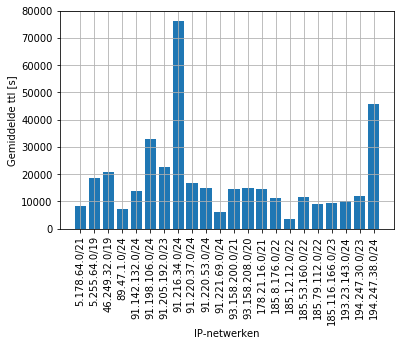

In [38]:
#ttl gemiddelde per netwerk
printlist = '5.178.64.0/21, 5.255.64.0/19, 46.249.32.0/19, 89.47.1.0/24, 91.142.132.0/24, 91.198.106.0/24, 91.205.192.0/23, 91.216.34.0/24,  91.220.37.0/24, 91.220.53.0/24, 91.221.69.0/24, 93.158.200.0/21, 93.158.208.0/20, 178.21.16.0/21, 185.8.176.0/22, 185.12.12.0/22, 185.53.160.0/22, 185.79.112.0/22, 185.116.166.0/23, 193.23.143.0/24, 194.247.30.0/23, 194.247.38.0/24'
printlist = printlist.split(', ')
ttl = []
for item in net_dic:
    test = net_dic[item].ttl.mean()
    print(test)
    ttl.append(float(test))
plt.bar(printlist, ttl)
plt.xticks(rotation=90)
plt.grid(b=True)
# plt.tight_layout()
plt.xlabel('IP-netwerken')
plt.ylabel('Gemiddelde ttl [s]')
plt.savefig('ttl_bar.png', bbox_inches = "tight")

In [35]:
net_dic['block7'][pd.notnull(net_dic['block7'].ttl)]

,domain,isp,is_hosting_provider,is_public_proxy,ip_int,is_ns,domains_ass,ns_ass,age,tld,2ld,ttl,smtp,ip
ip_int,,,,,,,,,,,,,,
1540891149,train-detrainer.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.hostingondemand.org., ns2.hostingondemand...",668.868484,nl,train-detrainer,86400.0,True,91.216.34.13
1540891149,surfsustainable.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns2.dnszones.eu., ns3.dnszo...",25.905671,nl,surfsustainable,86400.0,True,91.216.34.13
1540891149,zekerjezelfzijn.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.ams15.siteground.eu., ns1.dnszones.nl., n...",66.135949,nl,zekerjezelfzijn,86400.0,True,91.216.34.13
1540891149,cad-tekenservice.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns2.dnszones.eu., ns3.dnszo...",835.590069,nl,cad-tekenservice,86400.0,True,91.216.34.13
1540891149,sjaakkolvenbach.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns1.hostingondemand.org., n...",1494.993032,nl,sjaakkolvenbach,86400.0,True,91.216.34.13
1540891149,jstamtransportbv.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns1.hostingondemand.org., n...",964.182257,nl,jstamtransportbv,86400.0,True,91.216.34.13
1540891149,optrekbinckhorst.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns1.dnzones.nl., ns2.dnszon...",835.534745,nl,optrekbinckhorst,86400.0,True,91.216.34.13
1540891149,maartjenijenhuis.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.hostingondemand.org., ns2.hostingondemand...",668.857257,nl,maartjenijenhuis,86400.0,True,91.216.34.13
1540891149,huisongenummerd.nl.,Serverius Holding B.V.,True,False,1540891149,NaN,NaN,"[ns1.dnszones.nl., ns1.hostingondemand.org., n...",1170.496539,nl,huisongenummerd,86400.0,True,91.216.34.13


In [670]:

merged_dic = {}
for i, item in enumerate(net_dic):
    merged_dic[item] = merge_network(net_dic[item], i, 0.8)

,distance,ns_ass,is_ns,domain
10,0.550000,"[ns7.ictframeworks.nl., ns4.ictframeworks.org....",NaN,"[cpanel.requalparts.nl., requalparts.nl., webm..."
11,0.575758,"[ns19.zoneedit.com., ns18.zoneedit.com.]",NaN,"[dawi.be., dawidowicz.org., www.dawi.be., www...."
12,0.548387,"[dns1.ximple.nl., dns3.ximple.nl., dns2.ximple...",NaN,"[mail.gratiskortingcodes.nl., gratiskortingcod..."
13,0.517241,"[ns3.dootall.com., ns2.dootall.com., ns1.doota...",NaN,"[exchange.drtherapat.eu., www.drtherapat.eu., ..."
14,0.310345,"[ns1.anony.nl., ns2.anony.nl., ns3.anony.eu.]",NaN,"[mail.schermkapot.nl., uwmailonline.nl.]"
15,inf,"[ns2.knothev6.nl., ns1.knothev6.nl.]",ns1.knothev6.nl.,"[www.distributionholland.com., ftp.samsunggala..."
16,inf,NaN,ns2.knothev6.nl.,NaN
17,0.466667,"[ns2.knothserv16.nl., ns1.knothserv16.nl., ns2...",NaN,"[themind.eu., mail.style-m.nl., mail.winterban..."
18,0.363636,"[v3.pcextreme.eu., ns2.hostingnameserver.net.,...",NaN,"[led-deco.fr., albarzag.nl., www.albarzag.nl.]"
19,inf,"[ns2.knobolserv7.nl., ns1.forever01.nl., ns1.r...",ns1.forever01.nl.,"[kbvnet.com., mail.deelauto.be., pop.bellabaci..."


In [ ]:
printlist = '5.178.64.0/21, 5.255.64.0/19, 46.249.32.0/19, 89.47.1.0/24, 91.142.132.0/24, 91.198.106.0/24, 91.205.192.0/23, 91.216.34.0/24,  91.220.37.0/24, 91.220.53.0/24, 91.221.69.0/24, 93.158.200.0/21, 93.158.208.0/20, 178.21.16.0/21, 185.8.176.0/22, 185.12.12.0/22, 185.53.160.0/22, 185.79.112.0/22, 185.116.166.0/23, 193.23.143.0/24, 194.247.30.0/23, 194.247.38.0/24'
printlist = printlist.split(', ')
printlist = [IPNetwork(x) for x in printlist]
print(printlist)
counter = 0
res = []
for i in printlist:
    lookup = 'block' + str(counter)
#     prinlookupup)
    print(int(merged_dic[lookup].ttl.mean()))
    counter += 1

In [240]:
def tld_dist(ip1, ip2):
    total = 0
    for count in range(0, len(ip1)):
        total += math.fabs(ip1[count] - ip2[count]) #/1 max = 1 min = 0 max-min
        print(('ip1: {0}, ip2: {1}, total: {2}').format(ip1[count], ip2[count], total))
    logans = 1 - ((1/len(ip1)) * total)
    print(logans)
    if logans == 0:
        return 1.0
    return - math.log(logans, 10)
# tld_dist([0.1, 0.5, 0.8], [0.3, 0.14, 0.9])
tld_dist([1, 0.512098], [0.22388, 1])

ip1: 1, ip2: 0.22388, total: 0.77612
ip1: 0.512098, ip2: 1, total: 1.264022
0.367989


0.43416516314904025

In [231]:
pdns_2018_9_10.index

Int64Index([  95567873,   95567876,   95567876,   95567876,   95567876,
              95567878,   95567878,   95567878,   95567880,   95567882,
            ...
            3270977235, 3270977235, 3270977246, 3270977246, 3270977246,
            3270977272, 3270977274, 3270977274, 3270977274, 3270977274],
           dtype='int64', name='ip_int', length=126178)

In [500]:
def combine_ip(new, old):
    ip_add = type(IPAddress('0.0.0.0'))
    ip_net = type(IPNetwork('0.0.0.0/21'))
    if isinstance(new, str):
        new = IPAddress(new)
    if isinstance(old, str):
        old = IPAddress(old)
        
    if isinstance(new, list):
        new = sorted(new)[0]
    if isinstance(old, list):
        new = sorted(old)[-1]
        
    if isinstance(new, ip_add):
        if isinstance(old, ip_add):
            return iprange_to_cidrs(new, old)
        elif isinstance(old, ip_net):
            return iprange_to_cidrs(new, old[-1])
        else:
            print('weird ip type3, new: ' + str(new) + ', old:' + str(old) )
    elif isinstance(new, ip_net):
        if isinstance(old, ip_add):
            return iprange_to_cidrs(new[0], old)
        elif isinstance(old, ip_net):
            return iprange_to_cidrs(new[0], old[-1])
        else:
            print('weird ip type2, new: ' + str(new) + ', old:' + str(old) )
    else:
        print('weird ip type1, new: ' + str(new) + ', old:' + str(old) ) 
combine_ip([IPNetwork('0.0.0.0/15'), IPNetwork('0.3.0.0/24'), IPNetwork('12.2.0.0/16')], '44.0.0.0')

[IPNetwork('0.0.0.0/3'),
 IPNetwork('32.0.0.0/5'),
 IPNetwork('40.0.0.0/6'),
 IPNetwork('44.0.0.0/32')]

In [84]:
printlist = '5.178.64.0/21, 5.255.64.0/19, 46.249.32.0/19, 89.47.1.0/24, 91.142.132.0/24, 91.198.106.0/24, 91.205.192.0/23, 91.216.34.0/24,  91.220.37.0/24, 91.220.53.0/24, 91.221.69.0/24, 93.158.200.0/21, 93.158.208.0/20, 178.21.16.0/21, 185.8.176.0/22, 185.12.12.0/22, 185.53.160.0/22, 185.79.112.0/22, 185.116.166.0/23, 193.23.143.0/24, 194.247.30.0/23, 194.247.38.0/24'
printlist = printlist.split(', ')
check_list = {IPNetwork(x):0 for x in printlist}
ans = 0
for network in raw_net_list:
    address = IPNetwork(network)[0]
    for checknet in check_list:
        if address in checknet:
            if IPNetwork(network)[-1] == IPNetwork(checknet)[-1]:
                continue
            else:
#                 print(str(address) + ' in ' + str(checknet) + ' len: ' + str(len(network)) + ' old len: ' + str(check_list[checknet]))
                check_list[checknet] += len(network)
#     if address in IPNetwork('46.249.32.0/19'):
#         print('first: ' + str(network[0]))
#         print('last: ' + str(network[-1]))
#         print('length: ' + str(len(network)))
#         ans += len(network)
# print(ans)       
for i in check_list:
    print(check_list[i])
#     print('net: ' + str(i) + ' len: ' + str(check_list[i]))


1376
5840
5987
0
0
0
0
0
0
0
0
768
3360
1776
552
504
844
312
256
0
0
0


In [30]:
len(pdns_2018_9_10[pd.notnull(pdns_2018_9_10.ttl)])

29787

In [496]:
#   for index, row in test.iterrows():
#         print(test.loc[index, :])
#       ifor_val = something
#       if <condition>:
#         ifor_val = something_else
#       df.at[i,'ifor'] = ifor_val

[IPNetwork('0.0.0.0/15'), IPNetwork('0.2.0.0/16'), IPNetwork('0.3.0.0/24')]

In [24]:

from publicsuffix import PublicSuffixList
from publicsuffix import fetch
psl_file = fetch()
psl = PublicSuffixList(psl_file)



# net_dic['block12'].tld = net_dic['block12'].domain.apply

In [81]:
info2 = info_merge[[ 'domain', 'ns_ass', 'age', 'tld', '2ld', 'ttl', 'ip']]
info2 = info2.reset_index(drop=True)
info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
domain    394 non-null object
ns_ass    251 non-null object
age       394 non-null object
tld       394 non-null object
2ld       394 non-null object
ttl       243 non-null object
ip        394 non-null object
dtypes: object(7)
memory usage: 21.6+ KB


In [120]:
info = net_dic['block12'][pd.notnull(net_dic['block12'].domain)]
# info = info.drop(['smtp', 'isp', 'is_hosting_provider', 'is_public_proxy', 'is_ns' ,'domains_ass'], axis=1)
merge_info = merge_network(info, 12)

Block: 12, time taken: 11.993871212005615


In [135]:
info = initialize_dist(merge_info, 0, {"domain": 0, "ns_ass": 0, "tld": 0, "2ld": 0,
            "ttl": 0, "age": 10}, 12, 1)



In [137]:
info.index = info.ip
info[['distance', 'age']].iloc[0:30]

,distance,age
ip,,
93.158.208.1,0.108444,897.206
93.158.208.10,0.379921,716.477
93.158.208.23,0.031615,83.3125
93.158.208.29,0.013813,30.6235
93.158.208.35,0.021355,7.60271
93.158.208.36,0.021086,43.1924
93.158.208.37,0.004891,8.05173
93.158.208.38,0.013031,16.2028
93.158.208.39,0.002980,37.9201


In [125]:

info[['distance', 'ns_ass']].iloc[4].ns_ass

['ns17.smartwebng.com.',
 'becky.ns.cloudflare.com.',
 'ns1.serversdaddy.com.',
 'max2.speedhost247.com.',
 'ns18.smartwebng.com.',
 'ns2.smartweb.com.ng.',
 'justin.ns.cloudflare.com.',
 'ns1mtw.name.com.',
 'admissionlist.com.ng.',
 'ns2dfg.name.com.',
 'dns11.parkpage.foundationapi.com.',
 'ns19.domaincontrol.com.',
 'ns3gmv.name.com.',
 'ns4bht.name.com.',
 'talkglitz.tv.',
 'server1.cryptnat.com.',
 'lila.ns.cloudflare.com.',
 'ns5.doveserver.com.',
 'ns4.stackdns.com.',
 'bit-miner.club.',
 'ns2.serversdaddy.com.',
 'lola.ns.cloudflare.com.',
 'ns1078.ifastnet.com.',
 'blast1.speedhost247.com.',
 'blast2.speedhost247.com.',
 'server2.cryptnat.com.',
 'ns65.domaincontrol.com.',
 'ns07.domaincontrol.com.',
 'dns2.namecheaphosting.com.',
 'dns1.namecheaphosting.com.',
 'ns17.doveserver.com.',
 'mark.ns.cloudflare.com.',
 'noah.ns.cloudflare.com.',
 'ns2078.ifastnet.com.',
 'ns38.doveserver.com.',
 'ns37.doveserver.com.',
 'ns6.doveserver.com.',
 'ns66.domaincontrol.com.',
 'ns1.stac

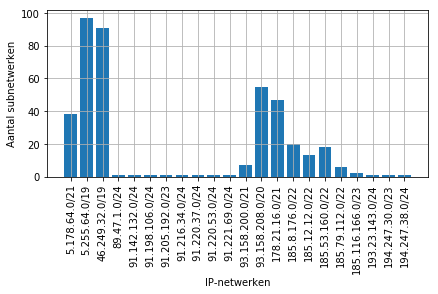

In [85]:
#verdeling subnetwerken per netwerk
printlist = '5.178.64.0/21, 5.255.64.0/19, 46.249.32.0/19, 89.47.1.0/24, 91.142.132.0/24, 91.198.106.0/24, 91.205.192.0/23, 91.216.34.0/24,  91.220.37.0/24, 91.220.53.0/24, 91.221.69.0/24, 93.158.200.0/21, 93.158.208.0/20, 178.21.16.0/21, 185.8.176.0/22, 185.12.12.0/22, 185.53.160.0/22, 185.79.112.0/22, 185.116.166.0/23, 193.23.143.0/24, 194.247.30.0/23, 194.247.38.0/24'
printlist = printlist.split(', ')
check_list = {IPNetwork(x):0 for x in printlist}
for network in raw_net_list:
    address = IPNetwork(network)[0]
    for checknet in check_list:
        if address in checknet:
            check_list[checknet] += 1
plt.bar(printlist, check_list.values())
plt.xticks(rotation=90)
plt.grid(b=True)
plt.tight_layout()
plt.xlabel('IP-netwerken')
plt.ylabel('Aantal subnetwerken')
plt.savefig('subnetwerk_verdeling.png')

In [97]:
values = [0, 0.5,0.9,0.7,0.9]
weights = [1,5,100,3,8]
final_dist = 0
for v in range(len(values)):
    final_dist += values[v] * weights[v]
final_dist = final_dist / sum(weights)
final_dist

0.8700854700854701

In [101]:
aggregation_functions = {'ip': 'first', 'domain': combine_categories, 
                         'ns_ass': combine_categories, 'age': 'mean', 'ttl': 'mean',
                        'tld': combine_categories, '2ld': combine_categories}
df_new = info.groupby(info['ip']).agg(aggregation_functions, axis = 'columns')

TypeError: combine_categories() missing 1 required positional argument: 'propold'